<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 유방암 데이터를 통한 앙상블 실습
  </h2>
</div>


In [3]:
from sklearn.metrics import confusion_matrix # 오차행렬
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import roc_auc_score # auc score
from sklearn.metrics import f1_score 

def get_clf_eval(y_test,y_pred):
    matrix = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    auc = roc_auc_score(y_test,y_pred)
    
    print('{}'.format('RESULT'))
    print('Confusion Matrix : ')
    print(matrix)
    print('-'*30)
    
    print('Accuaracy Score : ')
    print(accuracy)
    print('-'*30)
    
    print('Precision Score : ')
    print(precision)
    print('-'*30)
    
    print('Recall Score : ')
    print(recall)
    print('-'*30)
    
    print('F1 Score : ')
    print(f1)
    print('-'*30)
    
    print('AUC Score : ')
    print(auc)
    print('-'*30)

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# mpl.rcParams['font.family'] = 'AppleGothic'

## Voting 예제

In [5]:
# voting을 도와주는 패키지 
from sklearn.ensemble import VotingClassifier

# 보팅에 사용될 모델 총 3개의 분류모델 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

In [6]:
cancer = load_breast_cancer() # 데이터를 불러옴 
# 데이터를 프레임으로 만듬 
cancer_df = pd.DataFrame(data=cancer.data,
                         columns=cancer.feature_names)
# Y label == target 
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, # cancer_df.iloc[:,:-1] 혹은 cancer_df.drop('target',axis=1)
                                                    y, # cancer_df.target
                                                    test_size=0.3,
                                                   random_state=42)

---

## Ensemble_ExtraTreesClassifier



In [10]:
from sklearn.ensemble import ExtraTreesClassifier 
extra_clf = ExtraTreesClassifier(random_state=42) # 모델 정의 
extra_clf.fit(X_train, y_train) # 모델 학습 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [11]:
# 모델이 독립변수 X 들을 어떻게 생각했고 반영했는지 결과를 나타냄 
extra_clf.feature_importances_

array([0.06407783, 0.02074978, 0.03776231, 0.03523269, 0.01231294,
       0.02966937, 0.06429832, 0.08472571, 0.00696796, 0.00801537,
       0.02117683, 0.00702848, 0.01803733, 0.03648374, 0.00708997,
       0.00851337, 0.00831004, 0.00973251, 0.00575859, 0.00928122,
       0.09801497, 0.02420737, 0.08346943, 0.06668005, 0.02341141,
       0.0238605 , 0.06182454, 0.09972161, 0.01410159, 0.00948418])

In [14]:
# numpy --> array 
f_imp = pd.DataFrame(data= extra_clf.feature_importances_,
                     index = cancer.feature_names,
                     columns=['importance'])
f_imp.T # T= Transpose , 행과 열을 바꿈 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
importance,0.064078,0.02075,0.037762,0.035233,0.012313,0.029669,0.064298,0.084726,0.006968,0.008015,...,0.098015,0.024207,0.083469,0.06668,0.023411,0.02386,0.061825,0.099722,0.014102,0.009484


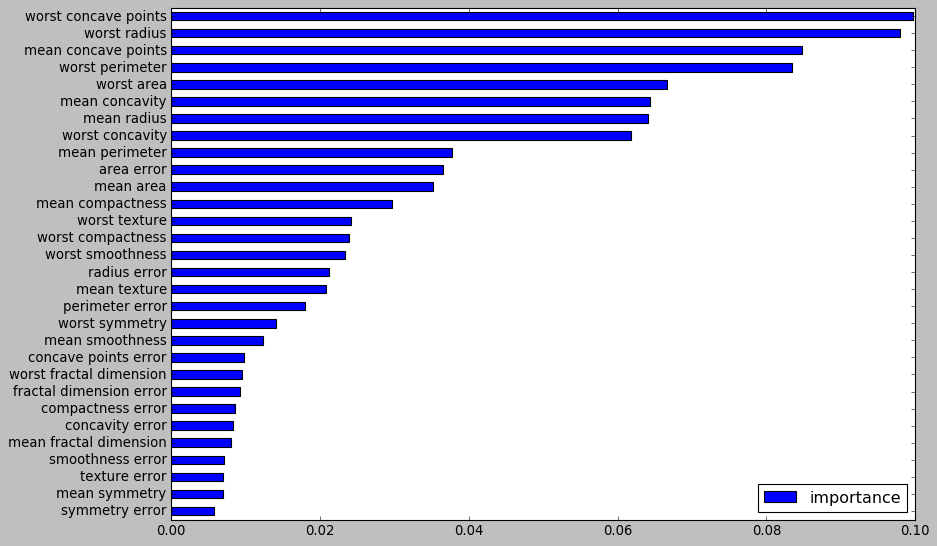

In [20]:
# plt.style.use('ggplot') # 스타일을 바꾸는 
plt.style.use('classic')

# plot( barh ): 막대그래프로 그려주기  // sort_values = 오름 차순 정렬 
f_imp.sort_values(by='importance').plot(kind='barh',figsize=(12,8))
plt.show()

## Ensemble_RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42) # 모델정의
rf_clf.fit(X_train, y_train) # 학습 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
f_imp = pd.DataFrame(extra_clf.feature_importances_,
                     index = cancer.feature_names,
                     columns=['importance'])
f_imp.T

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
importance,0.064078,0.02075,0.037762,0.035233,0.012313,0.029669,0.064298,0.084726,0.006968,0.008015,...,0.098015,0.024207,0.083469,0.06668,0.023411,0.02386,0.061825,0.099722,0.014102,0.009484


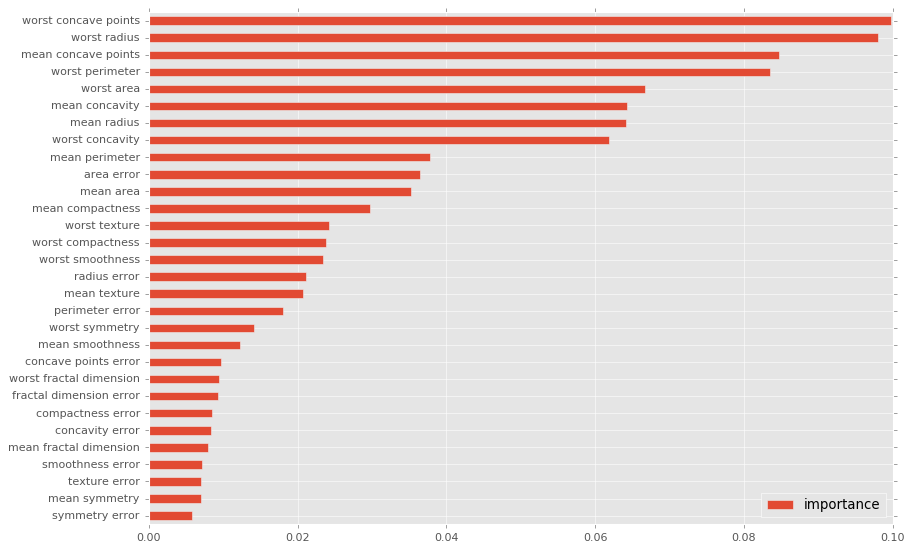

In [23]:
plt.style.use('ggplot')
f_imp.sort_values(by='importance').plot(kind='barh',figsize=(12,8))
plt.show()

## 각종 지표들

In [25]:
y_pred = rf_clf.predict(X_test)

In [26]:
get_clf_eval(y_test,y_pred)

RESULT
Confusion Matrix : 
[[ 59   4]
 [  1 107]]
------------------------------
Accuaracy Score : 
0.9707602339181286
------------------------------
Precision Score : 
0.963963963963964
------------------------------
Recall Score : 
0.9907407407407407
------------------------------
F1 Score : 
0.9771689497716894
------------------------------
AUC Score : 
0.9636243386243386
------------------------------


<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 와인 데이터를 통한 앙상블_랜덤포레스트 실습
  </h2>
</div>


- Ensemble_RandomForest
- Feature importance 뽑기

In [36]:
# sklearn 에서 제공하는 분류데이터셋 
# wine 데이터, 유방암, 붓꽃 
from sklearn.datasets import load_wine

wine = load_wine() # 데이터를 불러옴 
# 데이터를 프레임으로 만듬 
wine_df = pd.DataFrame(data=wine.data,
                         columns=wine.feature_names)
# Y label == target 
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [37]:
X = wine_df.drop('target',axis=1)
y = wine_df.target

In [38]:
# X 값을 스케일링 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 정의
XX = scaler.fit_transform(X) # 스탠다드 사용하여 변환 

In [39]:
# train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(XX, y, test_size=0.3, random_state=42)

In [49]:
# modeling 
# RandomForest --> 앙상블 방법 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42) # 정의 
model.fit(X_train,y_train) # 학습 
model.score(X_test,y_test) # 평가 

1.0

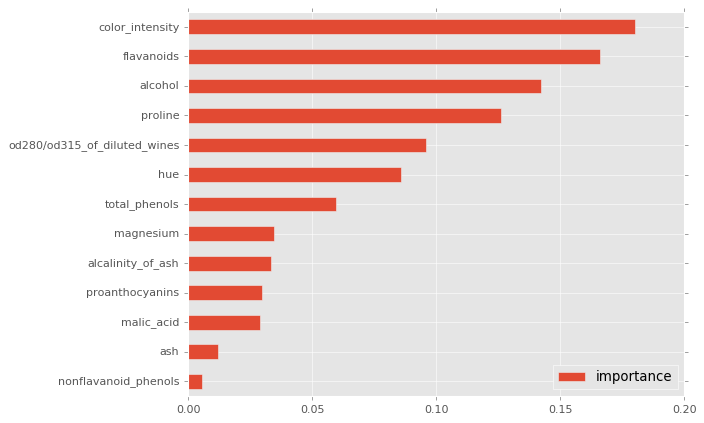

In [50]:
# 평가 이유 : model.feature_importances_
df = pd.DataFrame(data=model.feature_importances_,
                  index=X.columns,
                  columns=['importance'])
df.sort_values('importance').plot(kind='barh')